In [3]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
!pip install streamlit_jupyter

print("done")

done


### Limitations/constraints equations

#### Time per week Constraints

X/200 + y/140 = 40

#### Production Max Cobstarints for both Type x and Type Y

x ≤ 6000;
y ≤ 4000

In [4]:
x = np.linspace(0, 6000, 1000) # generate 1000 equaly spaced values between 0 and 6000 
y = np.linspace(0, 4000, 1000 ) # generate 1000 equaly spaced values between 0 and 4000


### Plotting the Grap of Constraints

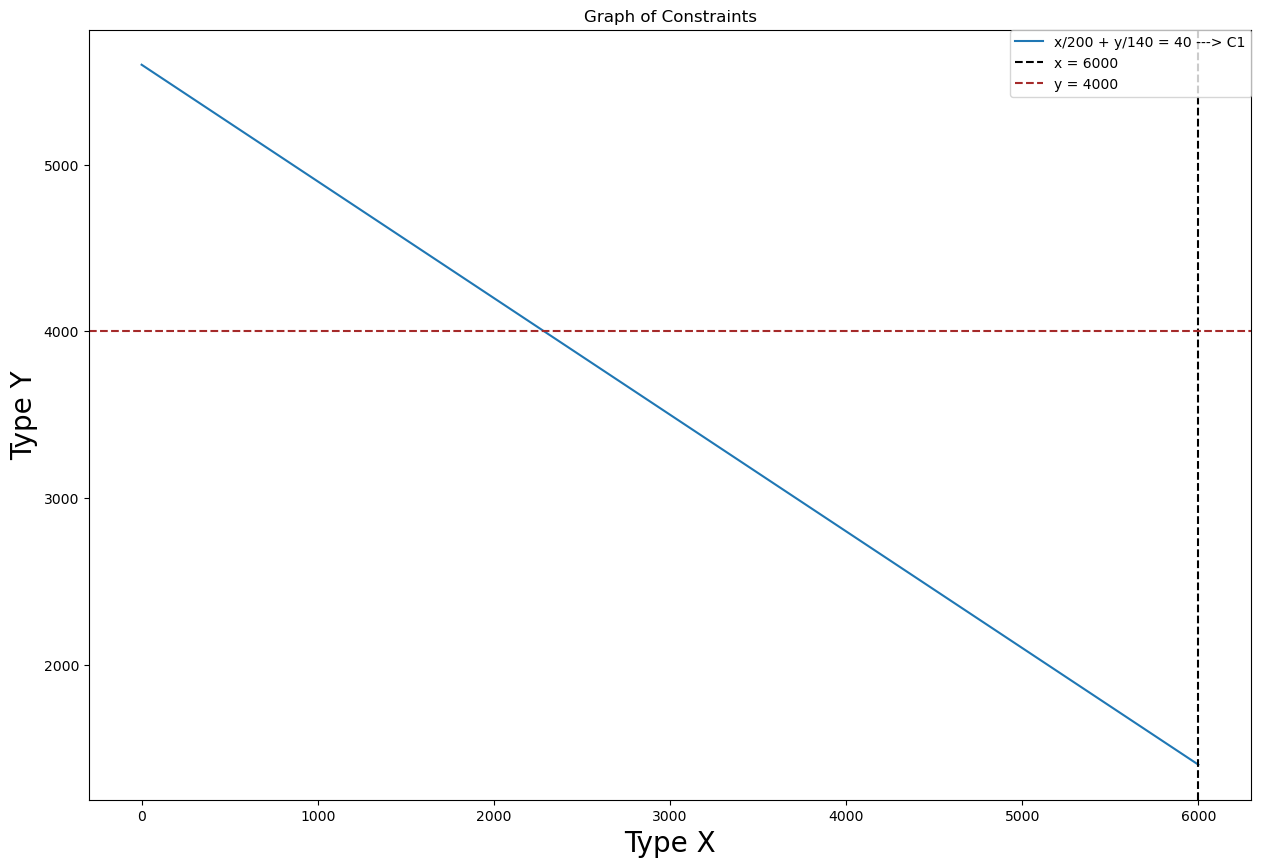

In [5]:
# determine the plot size
plt.figure(figsize= (15, 10))

# Plot the constraint equation
plt.plot(x, 140*(40 - x/200), label="x/200 + y/140 = 40 ---> C1")

# Plot the constraint lines
plt.axvline(x=6000, color='k', linestyle='--', label="x = 6000")
plt.axhline(y=4000, color='brown', linestyle='--', label="y = 4000")


# # limits
plt.title('Graph of Constraints')
plt.xlabel('Type X', fontsize = 20)
plt.ylabel('Type Y', fontsize = 20)

# # legend
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)


plt.show();

### Marking out the Feasible Region

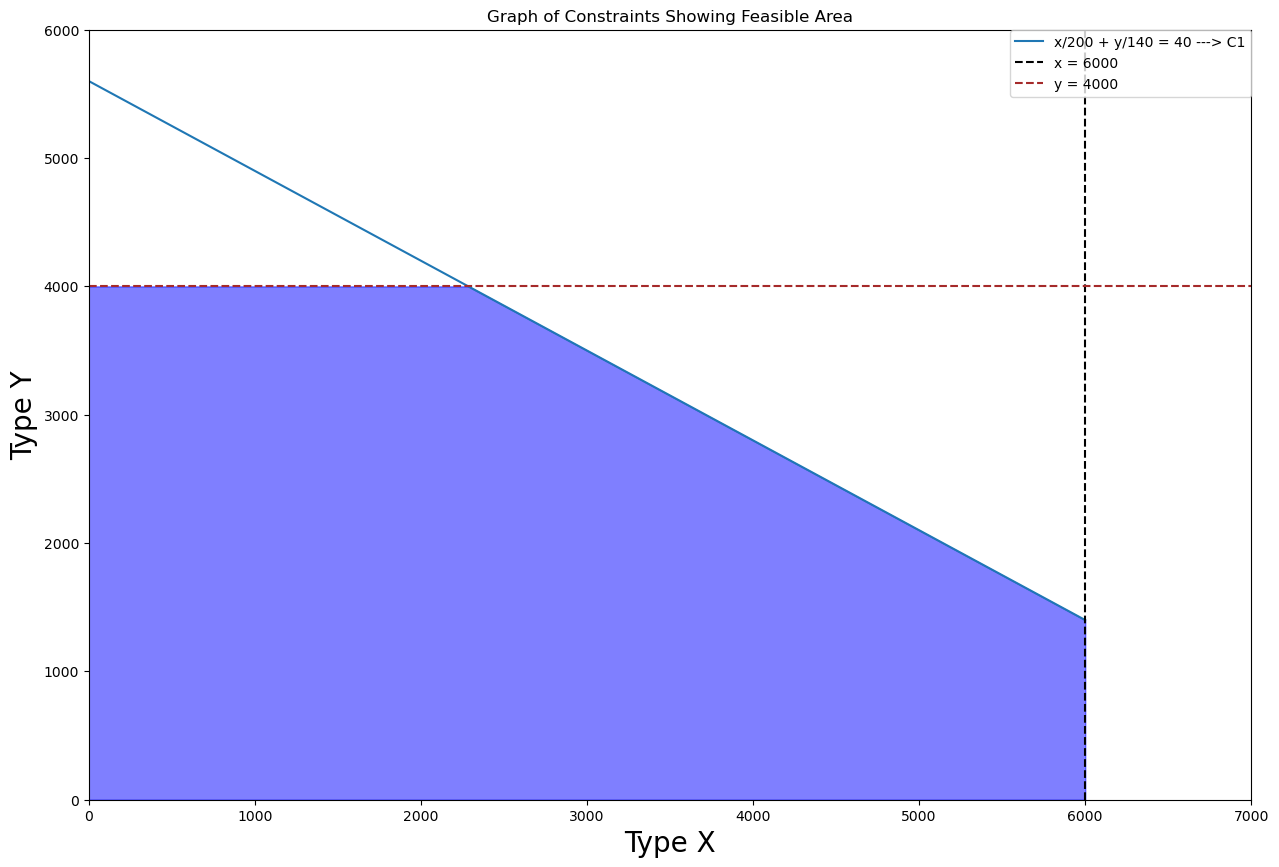

In [6]:
# determine the plot size
plt.figure(figsize= (15, 10))

# Plot the constraint equation
plt.plot(x, 140*(40 - x/200), label="x/200 + y/140 = 40 ---> C1")

# Plot the constraint lines
plt.axvline(x=6000, color='k', linestyle='--', label="x = 6000")
plt.axhline(y=4000, color='brown', linestyle='--', label="y = 4000")


# # limits
plt.title('Graph of Constraints Showing Feasible Area')
plt.ylim((0, 6000))
plt.xlim((0, 7000))
plt.xlabel('Type X', fontsize = 20)
plt.ylabel('Type Y', fontsize = 20)

# fill in the feasible region
plt.fill_between(x, # regular item 1 
                  np.minimum(140*(40 - x/200), 4000), # choose the minimum between x2 from two eqns
                 where = x >= 0, # defines any condition that might need to considered
                 color ='blue', # shaded region
                 alpha = 0.50) # transparency level

# legend placement
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

plt.show();

In [7]:
from scipy.optimize import linprog
from scipy.optimize import minimize

In [8]:
# Construct parameters
profit = np.array([25, 30]) #comes from the coefficients of the profit equation

# Inequality constraints
limitations = np.array([[1/200, 1/140], # first row comes from constriants 1
                     [1, 0], [0, 1]])  # second row comes from constraints 2

constraints = np.array([40, 6000, 4000]) # max amount of constraint


# Solve the problem
# we put a negative sign on the objective as linprog does minimization by default
production = linprog(-profit, A_ub = limitations, b_ub = constraints, method='revised simplex')

print('Optimal value:', abs(round(production.fun, ndigits=2)),
      '\nAmount of Type X:', round(production.x[0]),
      '\nAmount of Type Y:', round(production.x[1]),
      '\nStatus:', production.message)

Optimal value: 192000.0 
Amount of Type X: 6000 
Amount of Type Y: 1400 
Status: Optimization terminated successfully.


### Production Graph showing the optimal point of production

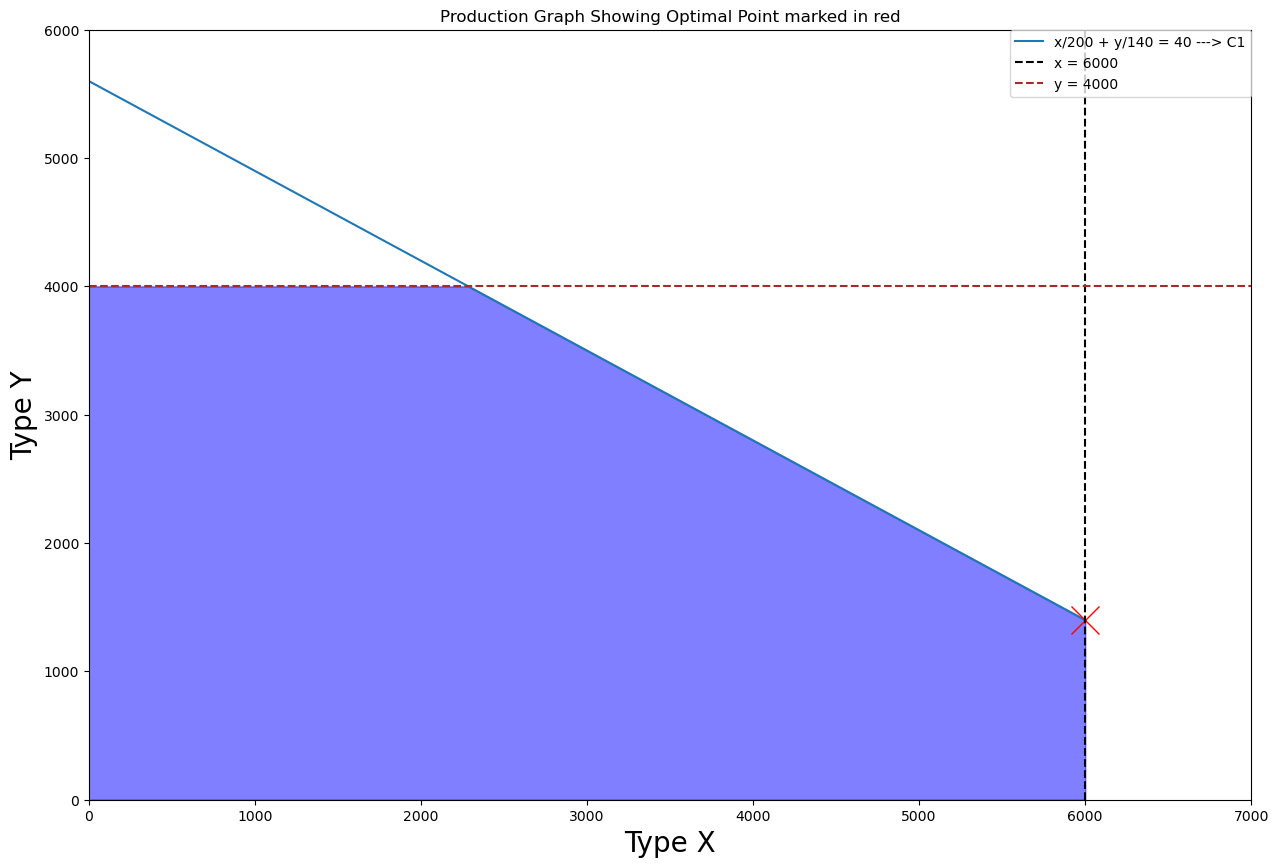

In [9]:
# determine the plot size
plt.figure(figsize= (15, 10))

# Plot the constraint equation
plt.plot(x, 140*(40 - x/200), label="x/200 + y/140 = 40 ---> C1")
plt.plot(production.x[0], production.x[1], marker="x", markersize=20, markeredgecolor="red", markerfacecolor="red")

# Plot the constraint lines
plt.axvline(x=6000, color='k', linestyle='--', label="x = 6000")
plt.axhline(y=4000, color='brown', linestyle='--', label="y = 4000")


# # limits
plt.title('Production Graph Showing Optimal Point marked in red')
plt.ylim((0, 6000))
plt.xlim((0, 7000))
plt.xlabel('Type X', fontsize = 20)
plt.ylabel('Type Y', fontsize = 20)

# fill in the feasible region
plt.fill_between(x, # regular item 1 
                  np.minimum(140*(40 - x/200), 4000), # choose the minimum between x2 from two eqns
                 where = x >= 0, # defines any condition that might need to considered
                 color ='blue', # shaded region
                 alpha = 0.50) # transparency level

# legend placement
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

plt.show();